In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Memory reducing functions
def reduceMem(df):
    start_mem=df.memory_usage().sum()/1024**2
    
    for c in df.columns:
        c_type=df[c].dtype
        
        if c_type != object:
            c_min=df[c].min()
            c_max=df[c].max()
            if str(c_type)[:3]=='int':
                if c_min>np.iinfo(np.int8).min and c_max<np.iinfo(np.int8).max:
                    df[c]=df[c].astype(np.int8)
                elif c_min>np.iinfo(np.int16).min and c_max<np.iinfo(np.int16).max:
                    df[c]=df[c].astype(np.int16)
                elif c_min>np.iinfo(np.int32).min and c_max<np.iinfo(np.int32).max:
                    df[c]=df[c].astype(np.int32)
                elif c_min>np.iinfo(np.int64).min and c_max<np.iinfo(np.int64).max:
                    df[c]=df[c].astype(np.int64)
            else:
                if c_min>np.finfo(np.float32).min and c_max<np.finfo(np.float32).max:
                    df[c]=df[c].astype(np.float32)
                else:
                    df[c]=df[c].astype(np.float64)
    end_mem=df.memory_usage().sum()/1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(start_mem,end_mem,100*(start_mem-end_mem)/start_mem))
    return df

In [3]:
# import train and test datasets
train=pd.read_csv('train_users_2.csv')
train=reduceMem(train)
test=pd.read_csv('test_users.csv')
test=reduceMem(test)

Memory usage of dataframe is 26.06 MB --> 23.82 MB (Decreased by 8.6%)
Memory usage of dataframe is 7.11 MB --> 6.45 MB (Decreased by 9.2%)


C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in less


In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
# Checking for missing values
def find_missing(train,test):
    count_missing_train=train.isnull().sum().values
    count_missing_test=test.isnull().sum().values
    total_train=train.shape[0]
    total_test=test.shape[0]
    ratio_missing_train=count_missing_train/total_train*100
    ratio_missing_test=count_missing_test/total_test*100
    return pd.DataFrame({'Missing_train':count_missing_train,'Missing_Ratio_train':ratio_missing_train,
                        'Missing_test':count_missing_test,'Missing_Ratio_test':ratio_missing_test},
                       index=train.columns)
df_missing=find_missing(train.drop(columns='country_destination',axis=1),test)
df_missing=df_missing[df_missing['Missing_Ratio_train']>0].sort_values(by='Missing_Ratio_train',ascending=False)

In [7]:
df_missing.head()

,Missing_train,Missing_Ratio_train,Missing_test,Missing_Ratio_test
date_first_booking,124543,58.347349,62096,100.000000
age,87990,41.222576,28876,46.502190
first_affiliate_tracked,6065,2.841402,20,0.032208


In [8]:
from sklearn.metrics import r2_score,mean_squared_error
# Print R2 and RMSE scores
def get_score(prediction,labels):
    print('R2:{}'.format(r2_score(prediction,labels)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(prediction,labels))))

# Shows scores of training and validation sets
def train_test(estimator,x_train,x_test,y_train,y_test):
    prediction_train=estimator.predict(x_train)
    print(estimator)
    get_score(prediction_train,y_train)
    prediction_test=estimator.predict(x_test)
    print("TEST")
    get_score(prediction_test,y_test)

In [9]:
# Combine train and test datasets.
features=pd.concat([train.drop(columns='country_destination'),test],keys=['Train','Test'])

In [10]:
features.head()

id date_account_created  timestamp_first_active  \
Train 0  gxn3p5htnn           2010-06-28          20090319043255   
      1  820tgsjxq7           2011-05-25          20090523174809   
      2  4ft3gnwmtx           2010-09-28          20090609231247   
      3  bjjt8pjhuk           2011-12-05          20091031060129   
      4  87mebub9p4           2010-09-14          20091208061105   

        date_first_booking     gender   age signup_method  signup_flow  \
Train 0                NaN  -unknown-   NaN      facebook            0   
      1                NaN       MALE  38.0      facebook            0   
      2         2010-08-02     FEMALE  56.0         basic            3   
      3         2012-09-08     FEMALE  42.0      facebook            0   
      4         2010-02-18  -unknown-  41.0         basic            0   

        language affiliate_channel affiliate_provider first_affiliate_tracked  \
Train 0       en            direct             direct               untracked   
      1       en               seo             google               untracked   
      2       en            direct             direct               untracked   
      3       en            direct             direct               untracked   
      4       en            direct             direct               untracked   

        signup_app first_device_type first_browser  
Train 0        Web       Mac Desktop        Chrome  
      1        Web       Mac Desktop        Chrome  
      2        Web   Windows Desktop            IE  
      3        Web       Mac Desktop       Firefox  
      4        Web       Mac Desktop        Chrome

In [11]:
# Delete features which contain a large ratio of missing values 
features.drop(columns='date_first_booking',axis=1,inplace=True)

In [12]:
features.head()

id date_account_created  timestamp_first_active     gender  \
Train 0  gxn3p5htnn           2010-06-28          20090319043255  -unknown-   
      1  820tgsjxq7           2011-05-25          20090523174809       MALE   
      2  4ft3gnwmtx           2010-09-28          20090609231247     FEMALE   
      3  bjjt8pjhuk           2011-12-05          20091031060129     FEMALE   
      4  87mebub9p4           2010-09-14          20091208061105  -unknown-   

          age signup_method  signup_flow language affiliate_channel  \
Train 0   NaN      facebook            0       en            direct   
      1  38.0      facebook            0       en               seo   
      2  56.0         basic            3       en            direct   
      3  42.0      facebook            0       en            direct   
      4  41.0         basic            0       en            direct   

        affiliate_provider first_affiliate_tracked signup_app  \
Train 0             direct               untracked        Web   
      1             google               untracked        Web   
      2             direct               untracked        Web   
      3             direct               untracked        Web   
      4             direct               untracked        Web   

        first_device_type first_browser  
Train 0       Mac Desktop        Chrome  
      1       Mac Desktop        Chrome  
      2   Windows Desktop            IE  
      3       Mac Desktop       Firefox  
      4       Mac Desktop        Chrome

In [13]:
#Split date_account_created into year,month,day
features[['dac_year','dac_month','dac_day']]=features.date_account_created.apply(lambda x:pd.Series(pd.to_datetime(x).strftime("%Y,%m,%d").split(',')))

In [14]:
features.drop(columns='date_account_created',axis=1,inplace=True)
features.head()

id  timestamp_first_active     gender   age signup_method  \
Train 0  gxn3p5htnn          20090319043255  -unknown-   NaN      facebook   
      1  820tgsjxq7          20090523174809       MALE  38.0      facebook   
      2  4ft3gnwmtx          20090609231247     FEMALE  56.0         basic   
      3  bjjt8pjhuk          20091031060129     FEMALE  42.0      facebook   
      4  87mebub9p4          20091208061105  -unknown-  41.0         basic   

         signup_flow language affiliate_channel affiliate_provider  \
Train 0            0       en            direct             direct   
      1            0       en               seo             google   
      2            3       en            direct             direct   
      3            0       en            direct             direct   
      4            0       en            direct             direct   

        first_affiliate_tracked signup_app first_device_type first_browser  \
Train 0               untracked        Web       Mac Desktop        Chrome   
      1               untracked        Web       Mac Desktop        Chrome   
      2               untracked        Web   Windows Desktop            IE   
      3               untracked        Web       Mac Desktop       Firefox   
      4               untracked        Web       Mac Desktop        Chrome   

        dac_year dac_month dac_day  
Train 0     2010        06      28  
      1     2011        05      25  
      2     2010        09      28  
      3     2011        12      05  
      4     2010        09      14

In [15]:
# split timestamp_first_active into year month and day
features[['tfa_year','tfa_month','tfa_day']]=features.timestamp_first_active.apply(lambda x:pd.Series(pd.to_datetime(str(x)[:8]).strftime('%Y,%m,%d').split(',')))

In [16]:
features.drop(columns='timestamp_first_active',axis=1,inplace=True)
features.head()

id     gender   age signup_method  signup_flow language  \
Train 0  gxn3p5htnn  -unknown-   NaN      facebook            0       en   
      1  820tgsjxq7       MALE  38.0      facebook            0       en   
      2  4ft3gnwmtx     FEMALE  56.0         basic            3       en   
      3  bjjt8pjhuk     FEMALE  42.0      facebook            0       en   
      4  87mebub9p4  -unknown-  41.0         basic            0       en   

        affiliate_channel affiliate_provider first_affiliate_tracked  \
Train 0            direct             direct               untracked   
      1               seo             google               untracked   
      2            direct             direct               untracked   
      3            direct             direct               untracked   
      4            direct             direct               untracked   

        signup_app first_device_type first_browser dac_year dac_month dac_day  \
Train 0        Web       Mac Desktop        Chrome     2010        06      28   
      1        Web       Mac Desktop        Chrome     2011        05      25   
      2        Web   Windows Desktop            IE     2010        09      28   
      3        Web       Mac Desktop       Firefox     2011        12      05   
      4        Web       Mac Desktop        Chrome     2010        09      14   

        tfa_year tfa_month tfa_day  
Train 0     2009        03      19  
      1     2009        05      23  
      2     2009        06      09  
      3     2009        10      31  
      4     2009        12      08

In [17]:
# Replace Missing values
numerics=['int16','int32','int64','float16','float32','float64']
df_numerics=features.select_dtypes(include=numerics)
df_numerics.head()

age
Train 0   NaN
      1  38.0
      2  56.0
      3  42.0
      4  41.0

In [18]:
df_numerics['age']=df_numerics['age'].fillna(df_numerics['age'].mean())

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
df_categorical=features.drop(columns=df_numerics.columns,axis=1)
df_categorical.head()

id     gender signup_method  signup_flow language  \
Train 0  gxn3p5htnn  -unknown-      facebook            0       en   
      1  820tgsjxq7       MALE      facebook            0       en   
      2  4ft3gnwmtx     FEMALE         basic            3       en   
      3  bjjt8pjhuk     FEMALE      facebook            0       en   
      4  87mebub9p4  -unknown-         basic            0       en   

        affiliate_channel affiliate_provider first_affiliate_tracked  \
Train 0            direct             direct               untracked   
      1               seo             google               untracked   
      2            direct             direct               untracked   
      3            direct             direct               untracked   
      4            direct             direct               untracked   

        signup_app first_device_type first_browser dac_year dac_month dac_day  \
Train 0        Web       Mac Desktop        Chrome     2010        06      28   
      1        Web       Mac Desktop        Chrome     2011        05      25   
      2        Web   Windows Desktop            IE     2010        09      28   
      3        Web       Mac Desktop       Firefox     2011        12      05   
      4        Web       Mac Desktop        Chrome     2010        09      14   

        tfa_year tfa_month tfa_day  
Train 0     2009        03      19  
      1     2009        05      23  
      2     2009        06      09  
      3     2009        10      31  
      4     2009        12      08

In [20]:
df_categorical['first_affiliate_tracked']=df_categorical['first_affiliate_tracked'].fillna(df_categorical['first_affiliate_tracked'].mode()[0])

In [21]:
features=pd.concat([df_numerics,df_categorical],axis=1)

In [22]:
features.head()

age          id     gender signup_method  signup_flow language  \
Train 0  47.145309  gxn3p5htnn  -unknown-      facebook            0       en   
      1  38.000000  820tgsjxq7       MALE      facebook            0       en   
      2  56.000000  4ft3gnwmtx     FEMALE         basic            3       en   
      3  42.000000  bjjt8pjhuk     FEMALE      facebook            0       en   
      4  41.000000  87mebub9p4  -unknown-         basic            0       en   

        affiliate_channel affiliate_provider first_affiliate_tracked  \
Train 0            direct             direct               untracked   
      1               seo             google               untracked   
      2            direct             direct               untracked   
      3            direct             direct               untracked   
      4            direct             direct               untracked   

        signup_app first_device_type first_browser dac_year dac_month dac_day  \
Train 0        Web       Mac Desktop        Chrome     2010        06      28   
      1        Web       Mac Desktop        Chrome     2011        05      25   
      2        Web   Windows Desktop            IE     2010        09      28   
      3        Web       Mac Desktop       Firefox     2011        12      05   
      4        Web       Mac Desktop        Chrome     2010        09      14   

        tfa_year tfa_month tfa_day  
Train 0     2009        03      19  
      1     2009        05      23  
      2     2009        06      09  
      3     2009        10      31  
      4     2009        12      08

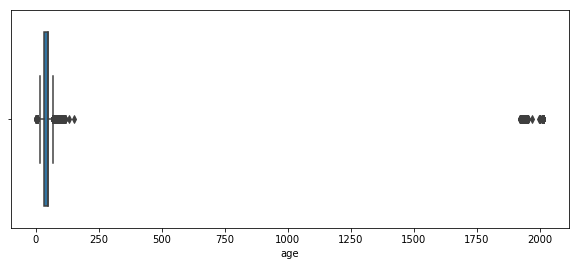

In [23]:
# take care of outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=features['age'])

In [24]:
features=features[(features['age']<=120)&(features['age']>0)]

In [25]:
features.head()

age          id     gender signup_method  signup_flow language  \
Train 0  47.145309  gxn3p5htnn  -unknown-      facebook            0       en   
      1  38.000000  820tgsjxq7       MALE      facebook            0       en   
      2  56.000000  4ft3gnwmtx     FEMALE         basic            3       en   
      3  42.000000  bjjt8pjhuk     FEMALE      facebook            0       en   
      4  41.000000  87mebub9p4  -unknown-         basic            0       en   

        affiliate_channel affiliate_provider first_affiliate_tracked  \
Train 0            direct             direct               untracked   
      1               seo             google               untracked   
      2            direct             direct               untracked   
      3            direct             direct               untracked   
      4            direct             direct               untracked   

        signup_app first_device_type first_browser dac_year dac_month dac_day  \
Train 0        Web       Mac Desktop        Chrome     2010        06      28   
      1        Web       Mac Desktop        Chrome     2011        05      25   
      2        Web   Windows Desktop            IE     2010        09      28   
      3        Web       Mac Desktop       Firefox     2011        12      05   
      4        Web       Mac Desktop        Chrome     2010        09      14   

        tfa_year tfa_month tfa_day  
Train 0     2009        03      19  
      1     2009        05      23  
      2     2009        06      09  
      3     2009        10      31  
      4     2009        12      08

In [26]:
# Change dtypes
features['dac_year']=features['dac_year'].astype(np.int16)
features['dac_month']=features['dac_month'].astype(np.int16)
features['dac_day']=features['dac_day'].astype(np.int16)
features['tfa_year']=features['tfa_year'].astype(np.int16)
features['tfa_month']=features['tfa_month'].astype(np.int16)
features['tfa_day']=features['tfa_day'].astype(np.int16)
features.dtypes[features.dtypes=='object']

id                         object
gender                     object
signup_method              object
language                   object
affiliate_channel          object
affiliate_provider         object
first_affiliate_tracked    object
signup_app                 object
first_device_type          object
first_browser              object
dtype: object

In [27]:
# Encode Label features
gender=set([x for x in features['gender']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(gender))),
                       index=features.index,columns=gender)
for i,cond in enumerate(zip(features['gender'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('Gender_')],axis=1)
features.drop(columns='gender',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [28]:
smethod=set([x for x in features['signup_method']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(smethod))),
                        index=features.index,columns=smethod)
for i,cond in enumerate(zip(features['signup_method'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('Signup_Method_')],axis=1)
features.drop(columns='signup_method',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [29]:
language=set([x for x in features['language']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(language))),
                        index=features.index,columns=language)
for i,cond in enumerate(zip(features['language'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('Language_')],axis=1)
features.drop(columns='language',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [30]:
afchannel=set([x for x in features['affiliate_channel']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(afchannel))),
                        index=features.index,columns=afchannel)
for i,cond in enumerate(zip(features['affiliate_channel'])):
    dummies.ix[i,cond]=1
feature=pd.concat([features,dummies.add_prefix('Affiliate_Channel_')],axis=1)
features.drop(columns='affiliate_channel',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [31]:
afprovider=set([x for x in features['affiliate_provider']])
dummies=pd.DataFrame(data=np.zeros((len(features.index),len(afprovider))),
                        index=features.index,columns=afprovider)
for i,cond in enumerate(zip(features['affiliate_provider'])):
    dummies.ix[i,cond]=1
feature=pd.concat([features,dummies.add_prefix('Affiliate_Provider_')],axis=1)
features.drop(columns='affiliate_provider',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [32]:
fac=set([x for x in features['first_affiliate_tracked']])
dummies=pd.DataFrame(np.zeros((len(features.index),len(fac))),
                        index=features.index,columns=fac)
for i,cond in enumerate(zip(features['first_affiliate_tracked'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('FAC_')],axis=1)
features.drop(columns='first_affiliate_tracked',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [33]:
sapp=set([x for x in features['signup_app']])
dummies=pd.DataFrame(np.zeros((len(features.index),len(sapp))),
                        index=features.index,columns=sapp)
for i,cond in enumerate(zip(features['signup_app'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('Signup_App_')],axis=1)
features.drop(columns='signup_app',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [34]:
fdt=set([x for x in features['first_device_type']])
dummies=pd.DataFrame(np.zeros((len(features.index),len(fdt))),
                        index=features.index,columns=fdt)
for i,cond in enumerate(zip(features['first_device_type'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('First_Device_Type_')],axis=1)
features.drop(columns='first_device_type',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [35]:
fb=set([x for x in features['first_browser']])
dummies=pd.DataFrame(np.zeros((len(features.index),len(fb))),
                        index=features.index,columns=fb)
for i,cond in enumerate(zip(features['first_browser'])):
    dummies.ix[i,cond]=1
features=pd.concat([features,dummies.add_prefix('First_Browser_')],axis=1)
features.drop(columns='first_browser',axis=1,inplace=True)

C:\Users\limo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [36]:
train=pd.merge(features.loc['Train'],train[['id','country_destination']],on='id')

In [37]:
train_target=train.iloc[:,-1].values
train_features=features.loc['Train'].drop(columns='id',axis=1).values
test_features=features.loc['Test'].drop(columns='id',axis=1).values

In [38]:
from sklearn.utils import shuffle
train_features,train_target=shuffle(train_features,train_target,random_state=0)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_features,train_target,test_size=0.2,random_state=0)

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier,train_features,train_target,cv=5)
print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

Accuracy : 0.57 (+/-0.00)


In [42]:
final=classifier.predict(test_features)

In [43]:
submission=pd.DataFrame({'Id':features.loc['Test']['id'].values})
submission['Country']=final
submission.to_csv('submission.csv',index=False)

In [44]:
from xgboost import XGBClassifier
clf=XGBClassifier(silent=0,learning_rate=0.3,min_child_weight=1,max_depth=8,
                  max_delta_step=0,colsample_bytree=0.8,n_estimators=100,subsample=0.8,seed=42).fit(x_train,
                  y_train,eval_metric='merror',eval_set=[(x_train,y_train),(x_test,y_test)],verbose=False)

[19:18:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[19:18:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=8
[19:18:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=8
[19:18:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[19:18:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[19:18:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=8
[19:18:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=8
[19:18:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 290 extra nodes, 0 pruned nodes, max_depth=8
[19:18:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes

[19:20:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=8
[19:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=8
[19:20:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 0 pruned nodes, max_depth=8
[19:20:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 0 pruned nodes, max_depth=8
[19:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 0 pruned nodes, max_depth=8
[19:20:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 0 pruned nodes, max_depth=8
[19:20:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 466 extra nodes, 0 pruned nodes, max_depth=8
[19:20:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=8
[19:20:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned node

[19:21:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=8
[19:21:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 0 pruned nodes, max_depth=8
[19:21:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 0 pruned nodes, max_depth=8
[19:21:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=8
[19:21:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[19:21:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nodes, max_depth=8
[19:21:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 0 pruned nodes, max_depth=8
[19:21:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=8
[19:21:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 0 pruned nod

[19:23:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 322 extra nodes, 0 pruned nodes, max_depth=8
[19:23:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[19:23:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=8
[19:23:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=8
[19:23:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 0 pruned nodes, max_depth=8
[19:23:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=8
[19:23:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=8
[19:23:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 0 pruned nodes, max_depth=8
[19:23:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned no

[19:24:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=8
[19:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=8
[19:24:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=8
[19:24:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=8
[19:24:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=8
[19:24:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=8
[19:24:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 0 pruned nodes, max_depth=8
[19:24:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 260 extra nodes, 0 pruned nodes, max_depth=8
[19:24:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned no

[19:25:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=8
[19:25:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 184 extra nodes, 0 pruned nodes, max_depth=8
[19:25:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=8
[19:25:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=8
[19:25:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=8
[19:25:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 0 pruned nodes, max_depth=8
[19:25:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 0 pruned nodes, max_depth=8
[19:25:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[19:25:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned no

[19:26:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[19:26:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=8
[19:26:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=8
[19:26:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=8
[19:26:29] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=8
[19:26:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=8
[19:26:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=8
[19:26:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=8
[19:26:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned node

[19:27:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=8
[19:27:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=8
[19:27:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=8
[19:27:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=8
[19:27:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=8
[19:27:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=8
[19:27:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 156 extra nodes, 0 pruned nodes, max_depth=8
[19:27:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=8
[19:27:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned node

[19:29:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=8
[19:29:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=8
[19:29:04] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=8
[19:29:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 0 pruned nodes, max_depth=8
[19:29:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=8
[19:29:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=8
[19:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=8
[19:29:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=8
[19:29:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nod

[19:30:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=8
[19:30:02] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=8
[19:30:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 288 extra nodes, 0 pruned nodes, max_depth=8
[19:30:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=8
[19:30:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 0 pruned nodes, max_depth=8
[19:30:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=8
[19:30:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[19:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 0 pruned nodes, max_depth=8
[19:30:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nod

[19:31:06] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 298 extra nodes, 0 pruned nodes, max_depth=8
[19:31:07] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 198 extra nodes, 0 pruned nodes, max_depth=8
[19:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 0 pruned nodes, max_depth=8
[19:31:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=8
[19:31:10] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=8
[19:31:11] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[19:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=8
[19:31:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 256 extra nodes, 0 pruned nodes, max_depth=8
[19:31:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned no

[19:32:09] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=8
[19:32:12] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=8
[19:32:13] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 188 extra nodes, 0 pruned nodes, max_depth=8
[19:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=8
[19:32:14] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=8
[19:32:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=8
[19:32:16] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 104 extra nodes, 0 pruned nodes, max_depth=8
[19:32:17] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=8
[19:32:18] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned no

[19:33:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 0 pruned nodes, max_depth=8
[19:33:20] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=8
[19:33:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 0 pruned nodes, max_depth=8
[19:33:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=8
[19:33:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 0 pruned nodes, max_depth=8
[19:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=8
[19:33:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 0 pruned nodes, max_depth=8
[19:33:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=8
[19:33:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nod

[19:34:21] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=8
[19:34:22] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=8
[19:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=8
[19:34:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 0 pruned nodes, max_depth=8
[19:34:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=8
[19:34:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 132 extra nodes, 0 pruned nodes, max_depth=8
[19:34:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=8
[19:34:27] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=8
[19:34:28] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned no

[19:35:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=8
[19:35:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=8
[19:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=8
[19:35:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 66 extra nodes, 0 pruned nodes, max_depth=8
[19:35:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned nodes, max_depth=8
[19:35:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 228 extra nodes, 0 pruned nodes, max_depth=8
[19:35:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=8
[19:35:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=8
[19:35:43] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nod

[19:36:44] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 0 pruned nodes, max_depth=8
[19:36:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 0 pruned nodes, max_depth=8
[19:36:46] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 0 pruned nodes, max_depth=8
[19:36:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 162 extra nodes, 0 pruned nodes, max_depth=8
[19:36:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=8
[19:36:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=8
[19:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=8
[19:36:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=8
[19:36:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 0 pruned no

[19:37:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=8
[19:37:50] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=8
[19:37:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 144 extra nodes, 0 pruned nodes, max_depth=8
[19:37:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=8
[19:37:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=8
[19:37:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=8
[19:37:57] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 0 pruned nodes, max_depth=8
[19:37:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 246 extra nodes, 0 pruned nodes, max_depth=8
[19:37:59] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 0 pruned no

In [45]:
# from sklearn.model_selection import cross_val_score
# accuracy=cross_val_score(clf,train_features,train_target,cv=5)
# print('Accuracy : %0.2f (+/-%0.2f)' % (accuracy.mean(),accuracy.std()*2))

In [46]:
final=clf.predict(test_features)

In [47]:
submission=pd.DataFrame({'Id':features.loc['Test']['id'].values})
submission['Country']=final
submission.to_csv('submission.csv',index=False)